In [476]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tab
import dython as dt
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from dython.nominal import associations

In [477]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


No duplicate rows in DF

In [478]:
df.duplicated().sum()

0

DF info

Checking for unique values and describe each column


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11687 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15015 non-null  object 
 6   education_level         14956 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15278 non-null  object 
 9   company_size            10547 non-null  object 
 10  company_type            10383 non-null  object 
 11  last_new_job            14994 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [480]:
for col in df.columns:
    print(str(col)+"-")
    print( )
    print(df[str(col)].unique())
    print( )
    print(df[str(col)].describe())
    print( )

enrollee_id-

[13163  9357   604 ... 25935  6525  3366]

count    15326.000000
mean     16887.713167
std       9612.278744
min          1.000000
25%       8594.750000
50%      17013.500000
75%      25186.000000
max      33380.000000
Name: enrollee_id, dtype: float64

city-

['city_16' 'city_136' 'city_145' 'city_160' 'city_84' 'city_139'
 'city_114' 'city_10' 'city_116' 'city_64' 'city_67' 'city_21' 'city_11'
 'city_103' 'city_173' 'city_28' 'city_59' 'city_98' 'city_115' 'city_150'
 'city_104' 'city_50' 'city_71' 'city_74' 'city_83' 'city_65' 'city_36'
 'city_100' 'city_53' 'city_41' 'city_69' 'city_159' 'city_73' 'city_19'
 'city_138' 'city_102' 'city_31' 'city_89' 'city_57' 'city_14' 'city_46'
 'city_27' 'city_175' 'city_141' 'city_90' 'city_61' 'city_75' 'city_142'
 'city_101' 'city_97' 'city_144' 'city_99' 'city_162' 'city_94' 'city_179'
 'city_26' 'city_39' 'city_111' 'city_123' 'city_72' 'city_152' 'city_134'
 'city_117' 'city_91' 'city_155' 'city_23' 'city_149' 'city_77' 'city_

In [481]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3639
relevent_experience          0
enrolled_university        311
education_level            370
major_discipline          2237
experience                  48
company_size              4779
company_type              4943
last_new_job               332
training_hours               0
target                       0
dtype: int64

Slicing extra string in variable city


In [482]:
df.city = df.city.str.slice(start=5)

Drawing graphs of all the variable by themself


C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


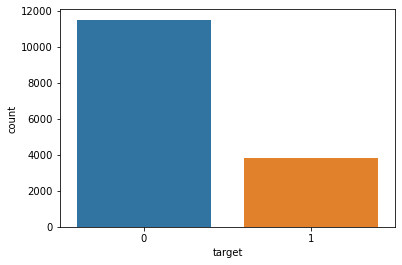

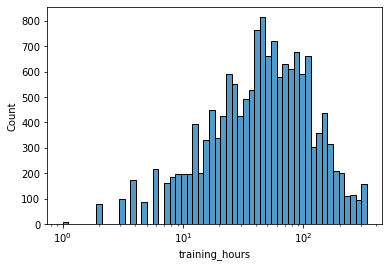

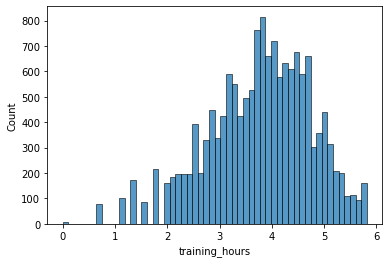

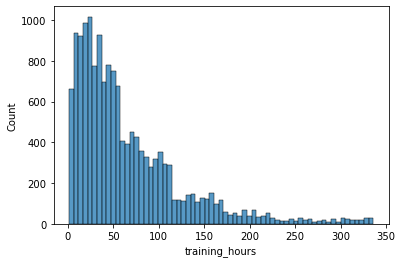

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


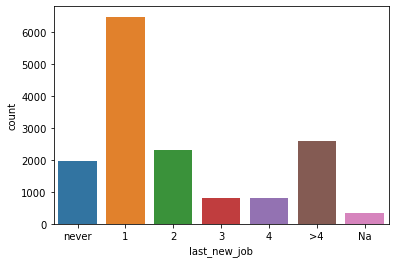

<ipython-input-492-28c0921882e8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_type[df.company_type=='Early Stage Startup'] = 'E.S S.U'
<ipython-input-492-28c0921882e8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_type[df.company_type=='Public Sector'] = 'Public'
<ipython-input-492-28c0921882e8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_type[df.company_type=='Funded Startup'] = 'F S.U'


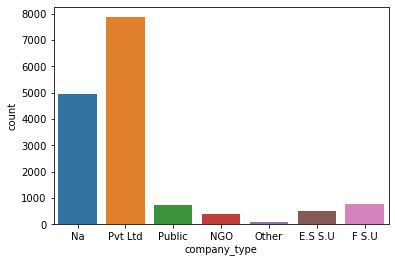

<ipython-input-492-28c0921882e8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_size[df.company_size=='1000-4999'] = '1K-4999'
<ipython-input-492-28c0921882e8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_size[df.company_size=='5000-9999'] = '5K-9999'
<ipython-input-492-28c0921882e8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_size[df.company_size=='10000+'] = '10K+'
C:\Users\peleg\anacond

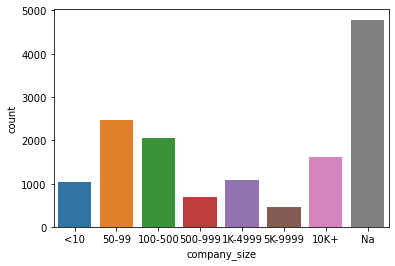

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


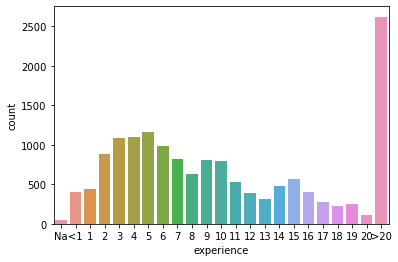

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


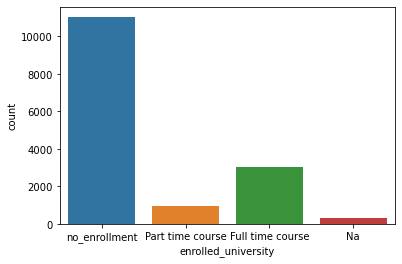

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


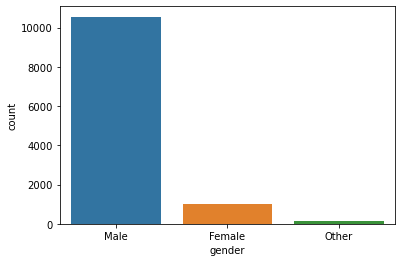

ValueError: 'explode' must be of length 'x'

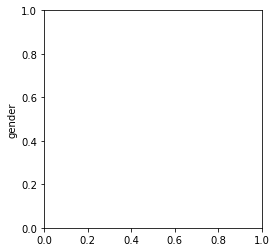

In [492]:
sns.countplot(df.target)
plt.show()

sns.histplot(df.training_hours,log_scale=True)
plt.show()
sns.histplot(np.log(df.training_hours))
plt.show()
sns.histplot(df.training_hours)
plt.show()


df.last_new_job = df.last_new_job.fillna('Na')
sns.countplot(df.last_new_job,order= ['never','1','2','3','4','>4','Na'])
plt.show()


df.company_type = df.company_type.fillna('Na')
df.company_type[df.company_type=='Early Stage Startup'] = 'E.S S.U'
df.company_type[df.company_type=='Public Sector'] = 'Public'
df.company_type[df.company_type=='Funded Startup'] = 'F S.U'
sns.countplot(df.company_type)
plt.show()


df.company_size = df.company_size.fillna('Na')
df.company_size[df.company_size=='1000-4999'] = '1K-4999'
df.company_size[df.company_size=='5000-9999'] = '5K-9999'
df.company_size[df.company_size=='10000+'] = '10K+'
sns.countplot(df.company_size,order = ['<10','50-99','100-500','500-999', '1K-4999','5K-9999','10K+','Na'])
plt.show()


df.experience = df.experience.fillna('Na')
sns.countplot(df.experience, order= ['Na','<1', '1','2','3', '4', '5', '6','7', '8','9','10','11','12',
                                     '13','14','15','16','17','18','19','20', '>20'])
plt.show()


df.enrolled_university = df.enrolled_university.fillna('Na')
sns.countplot(df.enrolled_university,order= ['no_enrollment','Part time course' ,'Full time course','Na'])
plt.show()

sns.countplot(df.gender)
plt.show()

df['gender'].value_counts().plot.pie(explode=[0.1,0.1,0.2,0.3],autopct='%1.1f%%',shadow=True,figsize=(4,4))
plt.show()

sns.countplot(df.relevent_experience)
plt.show()

sns.distplot(df.city)
plt.show()

df.education_level[df.education_level=='Primary School'] = 'Primary'
df.education_level = df.education_level.fillna('Na')
sns.countplot(df.education_level,order= ['Primary','High School','Graduate','Masters','Phd','Na'])
plt.show()


df.major_discipline = df.major_discipline.fillna('Na')
df.major_discipline[df.major_discipline=='Business Degree'] = 'Business'
df.major_discipline[df.major_discipline=='No Major'] = 'No'
sns.countplot(df.major_discipline)
plt.show()



<AxesSubplot:>

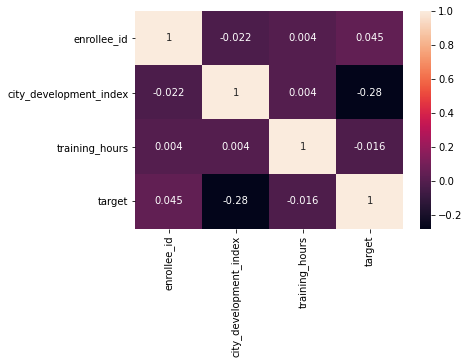

In [484]:
corrMatrix = df.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True)

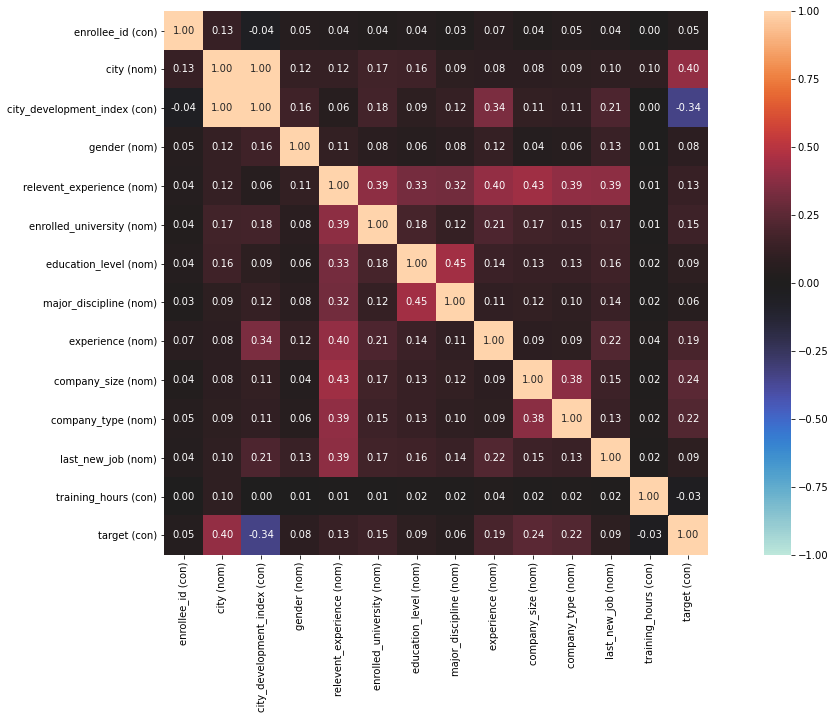

In [490]:
dt.nominal.associations(df,figsize=(20,10),mark_columns=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             15326 non-null  int64   
 1   city                    15326 non-null  object  
 2   city_development_index  15326 non-null  float64 
 3   gender                  15326 non-null  category
 4   relevent_experience     15326 non-null  object  
 5   enrolled_university     15326 non-null  object  
 6   education_level         14956 non-null  object  
 7   major_discipline        13089 non-null  object  
 8   experience              15326 non-null  object  
 9   company_size            15326 non-null  object  
 10  company_type            15326 non-null  object  
 11  last_new_job            15326 non-null  object  
 12  training_hours          15326 non-null  int64   
 13  target                  15326 non-null  int64   
 14  Male                  

<AxesSubplot:>

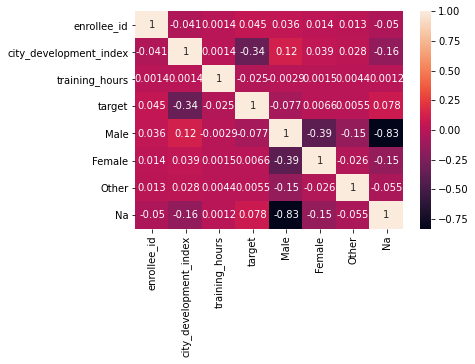

In [494]:
df.gender = pd.Categorical(df.gender,['Male','Female','Other','Na'])
df.info()

corrMatrix = df.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True)

<AxesSubplot:ylabel='gender'>

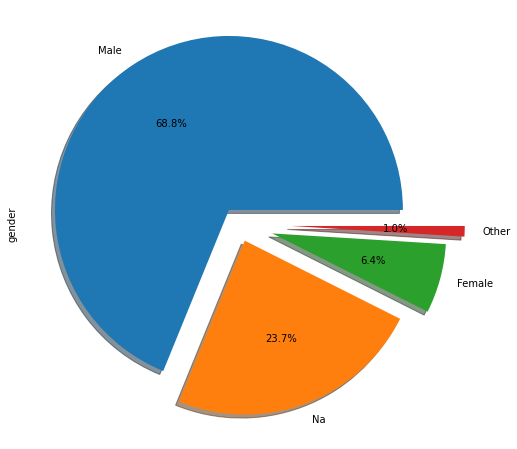

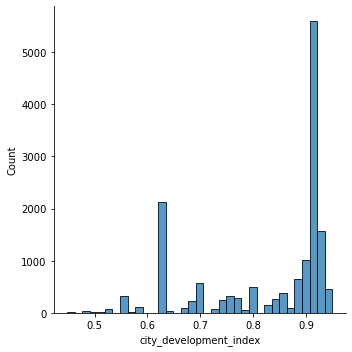

In [314]:
sns.displot(df.city_development_index)

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

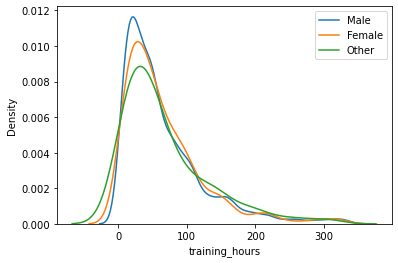

In [169]:
sns.distplot(df[df['gender'] == 'Male']['training_hours'],hist=False, kde=True, label='Male')
sns.distplot(df[df['gender'] == 'Female']['training_hours'], hist=False, kde=True, label='Female')
sns.distplot(df[df['gender'] == 'Other']['training_hours'], hist=False, kde=True, label='Other')
plt.legend()

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


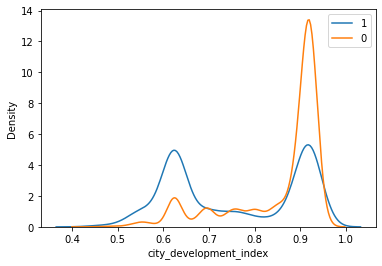

In [170]:
sns.distplot(df[df['target'] == 1]['city_development_index'],hist=False, kde=True, label='1')
sns.distplot(df[df['target'] == 0]['city_development_index'], hist=False, kde=True, label='0')
# sns.distplot(df[df['gender'] == 'Other']['target'], hist=False, kde=True, label='Other')
plt.legend()

<AxesSubplot:xlabel='target,relevent_experience'>

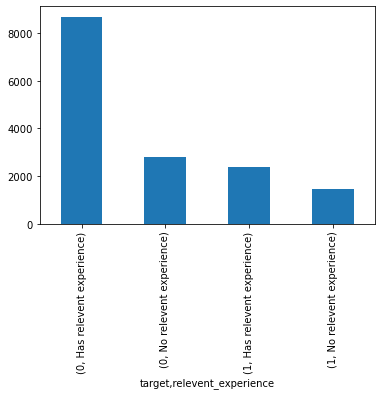

In [171]:
# df.groupby(["relevent_experience","target"]).count()["enrollee_id"].plot(kind="bar")
df.groupby(["target","relevent_experience"]).count()["enrollee_id"].plot(kind="bar")
# df.groupby(["target","relevent_experience"]).count()

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


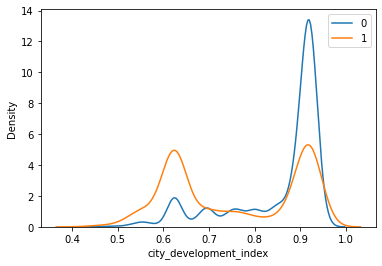

In [172]:
sns.distplot(df[df['target'] == 0]['city_development_index'],hist=False, kde=True, label='0')
sns.distplot(df[df['target'] == 1]['city_development_index'],hist=False, kde=True, label='1')
# sns.distplot(df[df['gender'] == 'Male']['city_development_index'],hist=False, kde=True, label='Male')
# sns.distplot(df[df['gender'] == 'Female']['city_development_index'],hist=False, kde=True, label='Female')
plt.legend()




array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

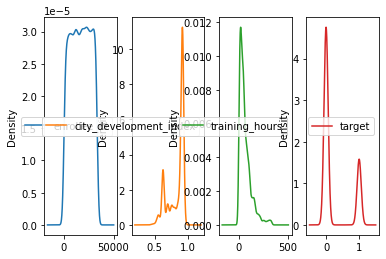

In [263]:
df.plot(kind='kde', subplots=True, layout=(1,4), sharex=False)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: city_development_index, dtype: object

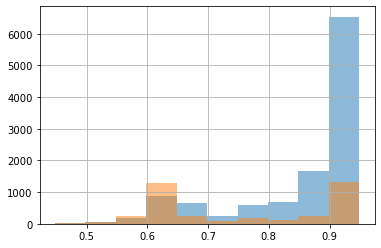

In [174]:
df.groupby('target').city_development_index.hist(alpha=0.5)

In [175]:
df['experience'] = df['experience'].replace(['>20'],21)
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,16,0.910,na,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1
5,3759,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,21,500-999,Pvt Ltd,2,18,0
6,23234,160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,29,0
7,32330,84,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,>4,122,1
8,22965,139,0.487,Male,Has relevent experience,no_enrollment,Masters,STEM,19,NaN,NaN,1,52,1
9,28416,160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,10,NaN,NaN,2,41,0


In [176]:
# df.groupby(['target']).mean()
# plt.scatter(df.city_development_index,df.training_hours)
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,16,0.910,na,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1
5,3759,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,21,500-999,Pvt Ltd,2,18,0
6,23234,160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,29,0
7,32330,84,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,>4,122,1
8,22965,139,0.487,Male,Has relevent experience,no_enrollment,Masters,STEM,19,NaN,NaN,1,52,1
9,28416,160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,10,NaN,NaN,2,41,0


C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='training_hours'>

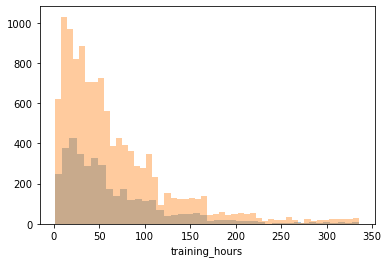

In [177]:
sns.distplot(df[df['target'] == 1]['training_hours'],hist=True, kde=False, label='Male')
sns.distplot(df[df['target'] == 0]['training_hours'], hist=True, kde=False, label='Female')

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'High School'

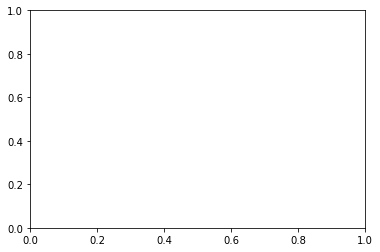

In [178]:
# df['education_level'] = df['education_level'].astype("category").cat.codes
# sns.distplot(df[df['target'] == 1]['education_level'],hist=False, kde=True, label='Male')
# sns.distplot(df[df['target'] == 0]['education_level'], hist=False, kde=True, label='Female')

In [493]:
#Creating a dummy variable for gender
df.gender = df.gender.fillna('Na')
df.gender = pd.Categorical(df.gender,['Male','Female','Other','Na'])
df1 = pd.get_dummies(df.gender)
frames = [df,df1]
df = pd.concat(frames,axis=1)
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Male,Female,Other,Na
0,13163,16,0.910,Na,No relevent experience,no_enrollment,High School,NaN,2,Na,Na,never,16,1,0,0,0,1
1,9357,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1K-4999,Pvt Ltd,1,262,0,1,0,0,0
2,604,16,0.910,Male,No relevent experience,Na,NaN,NaN,3,Na,Na,never,24,0,1,0,0,0
3,19033,16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,Na,Na,1,35,0,1,0,0,0
4,4825,145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,Na,Na,1,43,1,1,0,0,0
5,3759,136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,2,18,0,1,0,0,0
6,23234,160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,29,0,1,0,0,0
7,32330,84,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,>4,122,1,1,0,0,0
8,22965,139,0.487,Male,Has relevent experience,no_enrollment,Masters,STEM,19,Na,Na,1,52,1,1,0,0,0
9,28416,160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,10,Na,Na,2,41,0,1,0,0,0
